In [2]:
# Manipulation et analyse de données
import pandas as pd

# Visualisation graphique 
import matplotlib.pyplot as plt

import seaborn as sns

# Opérations mathématiques sur les tableaux
import numpy as np

# Diviser les données en un ensemble d'entraînement et un ensemble de test
from sklearn.model_selection import train_test_split

# Modèle de régression linéaire
from sklearn.linear_model import LinearRegression

# Evaluer les performances du modèle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Outil pour normaliser les caractéristiques des données
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# 1)  Collecte des données

In [3]:
data = pd.read_csv('data/dataset.csv')

# 2) Exploration des données 

In [4]:
data = data.drop('Unnamed: 0', axis=1)
print(data.columns)

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')


In [5]:
# Afficher les premières lignes du dataset

In [6]:
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [7]:
# Obtenir des informations sur les types de données et les valeurs manquantes

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

### Gestion des valeurs manquantes: 

In [9]:
# Afficher le nombre de valeurs manquantes pour chaque colonne
missing_values = data.isnull().sum()
print(missing_values)

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


<font color='blue'>Suggestions ChatGPT : </font>

1- Supprimer les lignes avec des valeurs manquantes: ...

2- Remplir les valeurs manquantes avec une valeur par défaut: ...

3- Imputer les valeurs manquantes: ...

Il est important de prendre en compte le contexte de votre projet et la signification des valeurs manquantes pour prendre une décision appropriée sur la façon de les traiter.

N'hésitez pas à me faire part de votre approche préférée pour gérer les valeurs manquantes, et je pourrai vous guider à travers les étapes de prétraitement correspondantes.

<font color='red'>Mais, il ne prend pas la décision à ma place.</font>

In [10]:
# Supprimer les lignes avec des valeurs manquantes
data = data.dropna()

In [11]:
# Vérifier à nouveau les valeurs manquantes
print(data.isnull().sum())

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

<font color='blue'>Toutes les colonnes sont maintenant conformes.</font>

In [13]:
# Obtenir des statistiques descriptives sur les données numériques

In [14]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Conclusions ChatGPT : 
    
D'après les résultats de la commande data.describe(), voici ce que l'on peut déduire et ce que l'on peut faire :

- La colonne "popularity" est la variable cible que l'on cherche à prédire.
- Les autres colonnes sont les caractéristiques (features) utilisées pour entraîner le modèle.
- La moyenne de la popularité est d'environ 33.24, avec un écart-type de 22.31. La popularité varie donc de manière significative dans le dataset.
- La durée moyenne des chansons est d'environ 228 029 millisecondes (environ 3 minutes et 48 secondes), avec un écart-type de 107 297 millisecondes. La durée des chansons varie également considérablement dans le dataset.
- Les autres caractéristiques, comme la danseabilité, l'énergie, le tempo, etc., ont également des moyennes et des écarts-types spécifiques.
- Les valeurs minimales et maximales de chaque colonne donnent une idée de la plage des valeurs présentes dans le dataset.

Sur la base de ces informations, voici ce que l'on peut faire :

- Examiner les caractéristiques les plus significatives en analysant leurs distributions statistiques et en identifiant celles qui semblent avoir une influence plus forte sur la popularité.
- Effectuer une analyse exploratoire des données pour mieux comprendre les relations entre les caractéristiques et la popularité.
- Utiliser des visualisations, comme des histogrammes, des graphiques de dispersion ou des graphiques en boîte, pour explorer les distributions et les relations entre les caractéristiques.

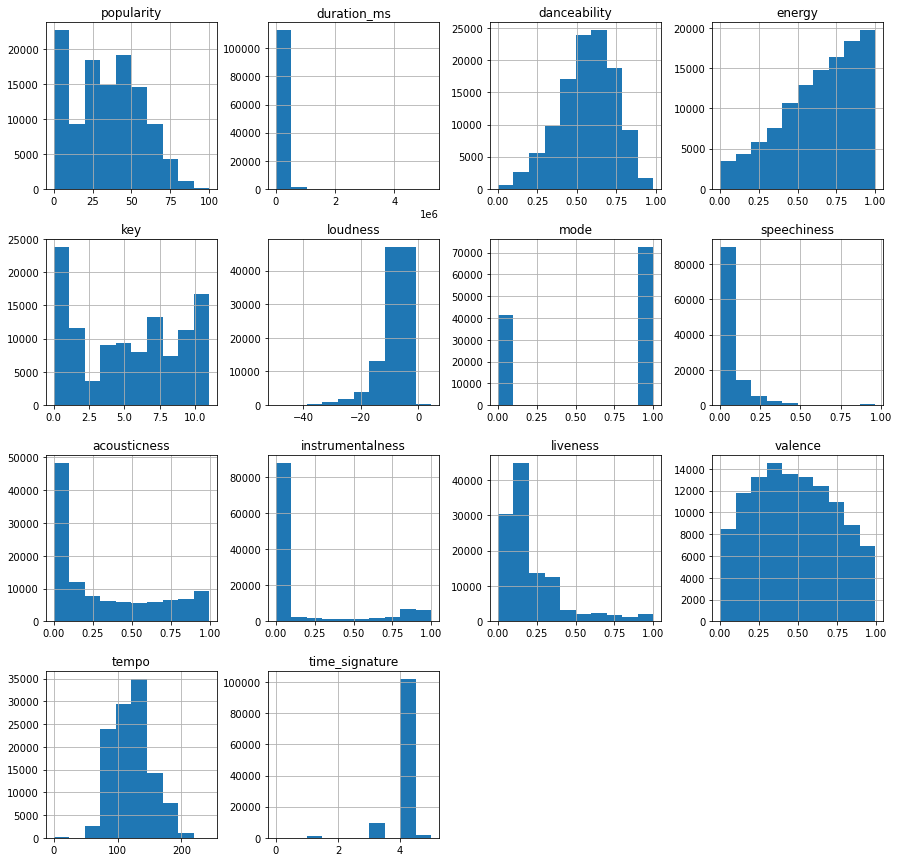

In [15]:
# Explorer les distributions des variables numériques 
data[['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre']].hist(figsize=(15, 15))
plt.show()

<font color='blue'>ChatGPT : </font>

Lorsque vous visualisez les histogrammes des variables numériques, vous pouvez prendre en considération plusieurs aspects pour évaluer leur pertinence :

- Forme de la distribution : Observez la forme de l'histogramme pour chaque variable. Une distribution normale ou proche d'une distribution normale (en forme de cloche) est souvent souhaitable car elle indique que les valeurs sont réparties de manière équilibrée autour de la moyenne.

- Valeurs manquantes ou aberrantes : Recherchez des valeurs manquantes ou aberrantes qui pourraient affecter la distribution de la variable. Des pics ou des valeurs extrêmes inhabituelles peuvent indiquer la présence de valeurs aberrantes.

- Relation avec la variable cible : Si vous effectuez une analyse de prédiction ou de classification, considérez la relation entre chaque variable et la variable cible. Vous pouvez visualiser des histogrammes séparés pour chaque classe de la variable cible et comparer les distributions pour identifier des variables potentiellement prédictives.

Il est important de noter que l'interprétation des histogrammes doit être effectuée en tenant compte du contexte de votre problème spécifique et des objectifs de votre analyse.

<font color='blue'>Apres avoir soumis mes constatations à chatGPT : </font>

Réponse : Les variables telles que "tempo", "valence", "danceability" semblent avoir une distribution proche d'une distribution normale, ce qui suggère qu'elles peuvent être pertinentes pour votre modèle. Vous pouvez également considérer les variables qui montrent des distributions spécifiques ou des relations intéressantes, telles que "mode" qui est répartie sur deux plages distinctes.

In [16]:
# Explorer les corrélations entre les variables

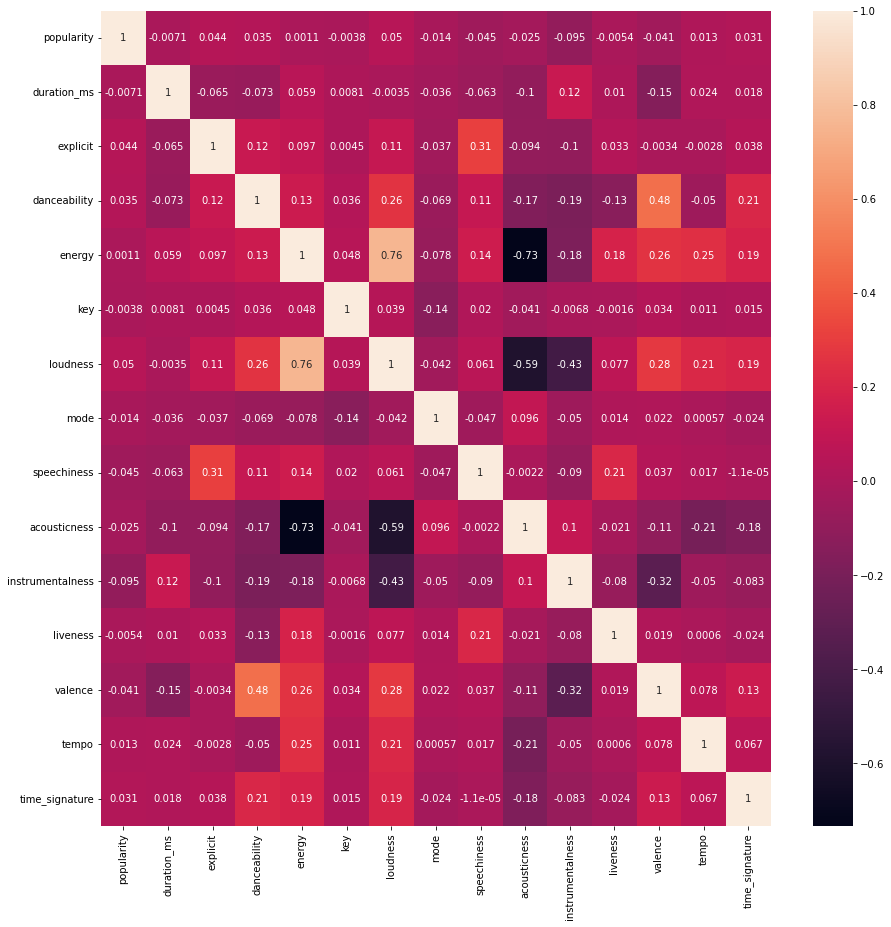

In [17]:
corr_matrix = data.corr()

plt.figure(figsize=(15, 15))  # Spécifiez la taille souhaitée ici (10 pouces de largeur, 8 pouces de hauteur)
sns.heatmap(corr_matrix, annot=True)

plt.show()

<font color='blue'>Explications ChatGpt :</font>
    
Une corrélation positive indique qu'il existe une relation directe entre les deux variables. Cela signifie que lorsque la valeur 
d'une variable augmente, la valeur de l'autre variable a tendance à augmenter également.

Une corrélation négative, en revanche, indique qu'il existe une relation inverse entre les deux variables. Cela signifie que lorsque la valeur d'une variable augmente, la valeur de l'autre variable a tendance à diminuer. 

In [18]:
data.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007129,0.044078,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076
duration_ms,-0.007129,1.000000,-0.065270,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229
explicit,0.044078,-0.065270,1.000000,0.122506,0.096954,0.004485,0.108587,-0.037216,0.307951,-0.094400,-0.103405,0.032547,-0.003378,-0.002815,0.038387
danceability,0.035444,-0.073435,0.122506,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219
energy,0.001053,0.058520,0.096954,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127
key,-0.003847,0.008123,0.004485,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064
loudness,0.050420,-0.003475,0.108587,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992
mode,-0.013948,-0.035581,-0.037216,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090
speechiness,-0.044930,-0.062605,0.307951,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011
acousticness,-0.025458,-0.103770,-0.094400,-0.171531,-0.733908,-0.040942,-0.589804,0.095568,-0.002184,1.000000,0.104033,-0.020693,-0.107081,-0.208231,-0.176142


<font color='blue'>Conclusions ChatGPT:</font>

- La popularité a une corrélation positive faible avec les variables "danceability", "energy", "loudness" et "tempo". Cela suggère que les chansons ayant une danceabilité, une énergie, une sonorité forte et un tempo élevé ont tendance à être plus populaires.
- La popularité a une corrélation négative faible avec les variables "acousticness" et "instrumentalness". Cela indique que les chansons moins acoustiques et moins instrumentales ont tendance à être plus populaires.
- Les autres variables telles que la durée, l'explicité, la clé, le mode, la speechiness, la liveness et la valence ont une corrélation relativement faible avec la popularité.

Il y a également des corrélations entre certaines colonnes indépendantes: 
- une corrélation positive entre "loudness" et "energy" = 0.76
- une corrélation positive entre "valence" et "danceability" = 0.48

## 3) Traitement des données 

In [19]:
cat_columns  = data.select_dtypes(include=['object']).columns.tolist()
num_columns  = data.select_dtypes(include=['number']).columns.tolist()
bool_columns = data.select_dtypes(include=['bool']).columns.tolist()

print("Variables catégorielles :", cat_columns,"\n")
print("Variables numériques :", num_columns,"\n")
print("Variables booléennes :", bool_columns)

Variables catégorielles : ['track_id', 'artists', 'album_name', 'track_name', 'track_genre'] 

Variables numériques : ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'] 

Variables booléennes : ['explicit']


### Traitement des variables catégorielles :

In [20]:
from sklearn.preprocessing import LabelEncoder

# Liste des variables catégorielles
variables_catégorielles = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

# Encodage des variables catégorielles
encoder = LabelEncoder()
for variable in variables_catégorielles:
    data[variable] = encoder.fit_transform(data[variable])

# Affichage du DataFrame avec les variables catégorielles encodées
data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,62845,10357,8100,11741,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,55667,3287,14796,22528,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,19766,12397,39162,60774,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,77941,14839,8580,9580,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,68241,5255,16899,25689,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


### Traitement des variables booléennes :

In [21]:
# Traitement des variables booléennes
data['explicit'] = data['explicit'].astype(int)
data

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,62845,10357,8100,11741,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0
1,55667,3287,14796,22528,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0
2,19766,12397,39162,60774,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0
3,77941,14839,8580,9580,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0
4,68241,5255,16899,25689,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,25198,22486,66,53329,21,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,113
113996,19583,22486,66,65090,22,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,113
113997,80126,4952,5028,38207,22,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,113
113998,30455,18534,7238,21507,41,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,113


### Division de notre jeu de données : data train et data test

In [22]:
from sklearn.model_selection import train_test_split

# Sélection des features et de la target
X = data.drop('popularity', axis=1)
y = data['popularity'] 

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions ensemble d'entraînement :", X_train.shape)
print("Dimensions ensemble de test :", X_test.shape)


Dimensions ensemble d'entraînement : (91199, 19)
Dimensions ensemble de test : (22800, 19)


# 4- Entrainement des modèles:

On commence par entrainer les différents modèles en utilisant les 19 features:

Régression linéaire
Erreur quadratique moyenne : 484.55687929316156
Erreur absolue moyenne : 18.37131231391475
Coefficient de détermination (R-squared) : 0.023247004451651065


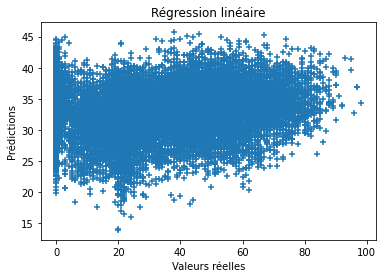

Regression Lasso
Erreur quadratique moyenne : 493.6092501190866
Erreur absolue moyenne : 18.784029105526372
Coefficient de détermination (R-squared) : 0.004999548479227789


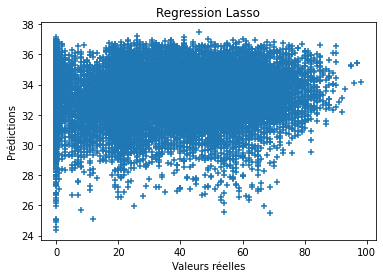

ElasticNet
Erreur quadratique moyenne : 492.8254847302422
Erreur absolue moyenne : 18.76249560065796
Coefficient de détermination (R-squared) : 0.006579435638146336


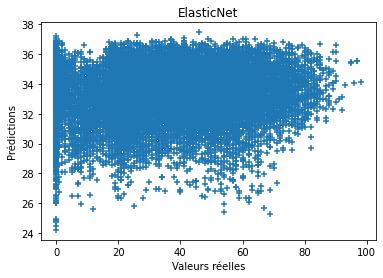

Decision Tree
Erreur quadratique moyenne : 440.2605263157895
Erreur absolue moyenne : 13.266052631578948
Coefficient de détermination (R-squared) : 0.11253806048955006


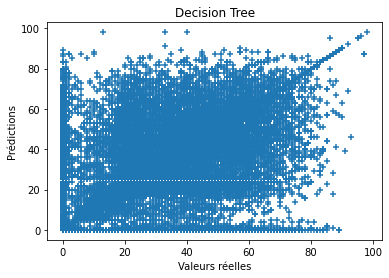

Random Forest
Erreur quadratique moyenne : 195.46210335526314
Erreur absolue moyenne : 10.389603947368423
Coefficient de détermination (R-squared) : 0.6059942534570293


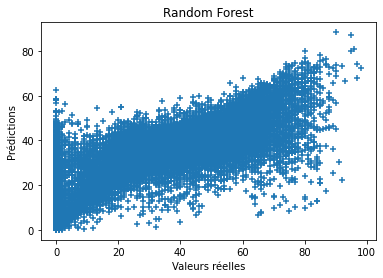

In [23]:
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = [
    LinearRegression(),
    Lasso(alpha=0.5),
    ElasticNet(alpha=0.5, l1_ratio=0.5),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

model_names = [
    "Régression linéaire",
    "Regression Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
]

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(name)
    print("Erreur quadratique moyenne :", mse)
    print("Erreur absolue moyenne :", mae)
    print("Coefficient de détermination (R-squared) :", r2)
    
    plt.scatter(y_test, y_pred, marker='+')
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Prédictions")
    plt.title(name)
    plt.show()


<font color='blue'>Conclusions ChatGPT:</font>

- Régression linéaire : La performance de la régression linéaire est assez faible avec un faible coefficient de détermination (R-squared). Vous pouvez essayer d'explorer d'autres modèles plus complexes ou utiliser des techniques de feature engineering pour améliorer la performance.

- Régression Lasso et ElasticNet : Ces modèles semblent avoir une performance similaire à la régression linéaire. Vous pouvez également explorer d'autres modèles plus avancés.

- Decision Tree : Le modèle de l'arbre de décision a une performance légèrement meilleure que la régression linéaire, mais il est encore possible d'améliorer les résultats. Vous pouvez essayer d'ajuster les hyperparamètres de l'arbre de décision, comme la profondeur maximale de l'arbre ou le nombre minimum d'échantillons requis pour diviser un nœud.

- Random Forest : Le modèle de Random Forest montre une performance relativement meilleure que les modèles précédents. Vous pouvez essayer d'optimiser les hyperparamètres du Random Forest, tels que le nombre d'estimateurs et la profondeur maximale de chaque arbre, pour voir s'il y a une amélioration supplémentaire possible.

# 5- Evaluation et optimisation:

### Choix du modèle: 

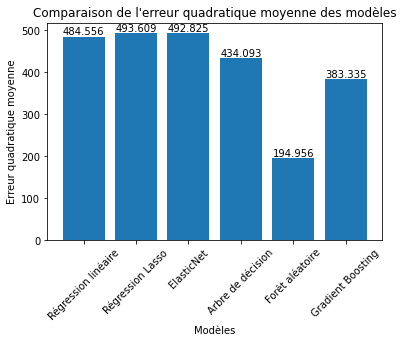

In [24]:
import matplotlib.pyplot as plt

models = ['Régression linéaire', 'Régression Lasso', 'ElasticNet', 'Arbre de décision', 'Forêt aléatoire', 'Gradient Boosting']
mse = [484.556, 493.609, 492.825, 434.093, 194.956, 383.335]

# Tracer le graphique
plt.bar(models, mse)
plt.xlabel('Modèles')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Comparaison de l\'erreur quadratique moyenne des modèles')
plt.xticks(rotation=45)

# Afficher les valeurs au-dessus de chaque barre
for i in range(len(models)):
    plt.text(i, mse[i], str(mse[i]), ha='center', va='bottom')

# Afficher le graphique
plt.show()


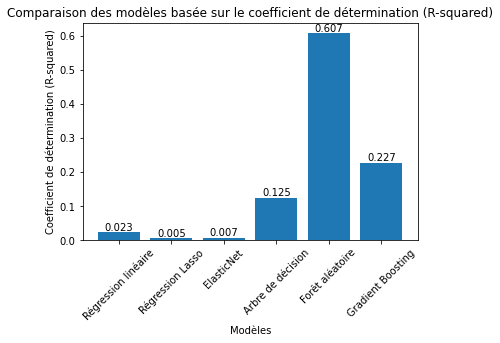

In [25]:
models = ['Régression linéaire', 'Régression Lasso', 'ElasticNet', 'Arbre de décision', 'Forêt aléatoire', 'Gradient Boosting']
r2_scores = [0.023, 0.005, 0.007, 0.125, 0.607, 0.227]

# Tracer le graphique
plt.bar(models, r2_scores)
plt.xlabel('Modèles')
plt.ylabel('Coefficient de détermination (R-squared)')
plt.title('Comparaison des modèles basée sur le coefficient de détermination (R-squared)')
plt.xticks(rotation=45)

# Afficher les valeurs au-dessus de chaque barre
for i in range(len(models)):
    plt.text(i, r2_scores[i], str(r2_scores[i]), ha='center', va='bottom')

# Afficher le graphique
plt.show()

### Améliorations proposées:

#### 1- Utilisation des varibles pertinentes selectionnées lors de la phase "Exploration de données"

Les features utilisés : "tempo", "valence", "danceability"

In [26]:
from sklearn.model_selection import train_test_split

# Sélection des features et de la target
X_bis = data.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'popularity',
                          'duration_ms', 'explicit', 'energy', 'key', 'loudness',
                          'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                          'time_signature', 'track_genre'])
y_bis = data['popularity'] 

# Diviser les données en ensembles d'entraînement et de test
X_train_bis, X_test_bis, y_train_bis, y_test_bis = train_test_split(X_bis, y_bis, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles d'entraînement et de test
print("Dimensions ensemble d'entraînement :", X_train_bis.shape)
print("Dimensions ensemble de test :", X_test_bis.shape)

Dimensions ensemble d'entraînement : (91199, 3)
Dimensions ensemble de test : (22800, 3)


Random Forest:
Erreur quadratique moyenne : 277.70113432321875
Erreur absolue moyenne : 12.114220571361141
Coefficient de détermination (R-squared) : 0.44021965963407106


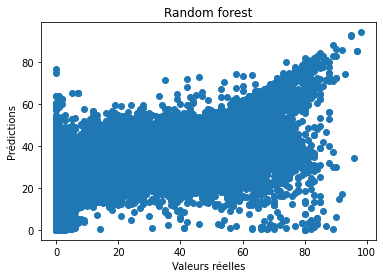

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Créer un modèle de forêt aléatoire
model = RandomForestRegressor()

# Entraîner le modèle sur les données d'apprentissage réduites en dimensions
model.fit(X_train_bis, y_train_bis)

# Prédire les valeurs de popularité sur les données de test réduites en dimensions
y_pred_bis = model.predict(X_test_bis)

mse = mean_squared_error(y_test_bis, y_pred_bis)
mae = mean_absolute_error(y_test_bis, y_pred_bis)
r2 = r2_score(y_test_bis, y_pred_bis)

print("Random Forest:")
print("Erreur quadratique moyenne :", mse)
print("Erreur absolue moyenne :", mae)
print("Coefficient de détermination (R-squared) :", r2)

plt.scatter(y_test_bis, y_pred_bis)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Random forest")
plt.show()


<font color='blue'>Conclusions ChatGPT:</font>
    
En comparant les résultats obtenus, on peut déduire que l'utilisation des 19 features a donné de meilleurs résultats que l'utilisation des 3 features seulement.

Lorsque seules les 3 features ("tempo", "valence" et "danceability") ont été utilisées, le modèle a montré une erreur quadratique moyenne (MSE) plus élevée, une erreur absolue moyenne (MAE) plus élevée et un coefficient de détermination (R-squared) plus faible. Cela indique que le modèle basé sur ces 3 features a moins bien ajusté les données et a donné des prédictions moins précises.

En revanche, lorsque les 19 features ont été utilisées, le modèle a montré une MSE plus faible, une MAE plus faible et un R-squared plus élevé. Cela suggère que le modèle basé sur les 19 features a mieux capturé les relations entre les variables et a donné des prédictions plus précises.

Par conséquent, on peut conclure que l'utilisation des 19 features est plus bénéfique pour la prédiction de la popularité par rapport à l'utilisation des 3 features seulement.

#### 2- Exploration d'autres modèles 

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Créer un modèle Gradient Boosting
model = GradientBoostingRegressor()

# Entraîner le modèle sur les données d'apprentissage
model.fit(X_train, y_train)

# Prédire les valeurs sur les données de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("GradientBoosting")
print("Erreur quadratique moyenne :", mse)
print("Erreur absolue moyenne :", mae)
print("Coefficient de détermination (R-squared) :", r2)

GradientBoosting
Erreur quadratique moyenne : 383.3355386774106
Erreur absolue moyenne : 15.836250940118177
Coefficient de détermination (R-squared) : 0.2272854814289601


<font color='blue'>Conclusions ChatGPT:</font>

Le modèle Gradient Boosting a une meilleure performance que les modèles précédents en termes de coefficient de détermination (R-squared). Cependant, il y a encore de la place pour l'amélioration. Vous pouvez expérimenter avec différents hyperparamètres, tels que le taux d'apprentissage et le nombre d'itérations, pour obtenir de meilleurs résultats.

#### 3- Réduction de la dimensionnalité : PCA 

In [33]:
from sklearn.decomposition import PCA

# Instancier l'objet PCA avec le nombre de composantes souhaité
n_components = 5
pca = PCA(n_components=n_components)

# Ajuster PCA sur l'ensemble d'entraînement
X_train_pca = pca.fit_transform(X_train)

# Appliquer la transformation PCA sur l'ensemble de test
X_test_pca = pca.transform(X_test)

# Afficher les dimensions des ensembles d'entraînement et de test après réduction de dimensionnalité
print("Dimensions ensemble d'entraînement après réduction de dimensionnalité :", X_train_pca.shape)
print("Dimensions ensemble de test après réduction de dimensionnalité :", X_test_pca.shape)


Dimensions ensemble d'entraînement après réduction de dimensionnalité : (91199, 5)
Dimensions ensemble de test après réduction de dimensionnalité : (22800, 5)


In [28]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Liste des dimensions à tester
dimensions = [6,10,14,18]

for n_components in dimensions:
    # Instancier l'objet PCA avec le nombre de composantes souhaité
    pca = PCA(n_components=n_components)

    # Ajuster PCA sur l'ensemble d'entraînement
    X_train_pca = pca.fit_transform(X_train)

    # Appliquer la transformation PCA sur l'ensemble de test
    X_test_pca = pca.transform(X_test)

    # Créer un modèle de forêt aléatoire
    model = RandomForestRegressor()

    # Entraîner le modèle sur les données d'apprentissage réduites en dimensions
    model.fit(X_train_pca, y_train)

    # Prédire les valeurs de popularité sur les données de test réduites en dimensions
    y_pred = model.predict(X_test_pca)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Nombre de composantes :", n_components)
    print("Random Forest:")
    print("Erreur quadratique moyenne :", mse)
    print("Erreur absolue moyenne :", mae)
    print("Coefficient de détermination (R-squared) :", r2)
    print()


Nombre de composantes : 6
Random Forest:
Erreur quadratique moyenne : 319.1561185131579
Erreur absolue moyenne : 14.21880307017544
Coefficient de détermination (R-squared) : 0.3566561365096065

Nombre de composantes : 10
Random Forest:
Erreur quadratique moyenne : 293.6424681447369
Erreur absolue moyenne : 13.366959210526314
Coefficient de détermination (R-squared) : 0.4080856703572753

Nombre de composantes : 14
Random Forest:
Erreur quadratique moyenne : 268.5618062061404
Erreur absolue moyenne : 12.742390789473685
Coefficient de détermination (R-squared) : 0.4586424011059854

Nombre de composantes : 18
Random Forest:
Erreur quadratique moyenne : 255.6664833377193
Erreur absolue moyenne : 12.336572368421054
Coefficient de détermination (R-squared) : 0.48463634687075696



<font color='blue'>Conclusions ChatGPT:</font>

On peut observer que l'erreur quadratique moyenne diminue et le coefficient de détermination (R-squared) augmente à mesure que le nombre de composantes principales augmente. Cela indique que l'utilisation d'un nombre plus élevé de composantes principales permet de capturer davantage de variabilité dans les données et d'améliorer les performances du modèle.

#### 4- Ajustement des Hyperpamètres du modèle:

On garde les 19 features en modifiant les paramètres du modèle :

##### Afficher les paramètres du modèle:

In [134]:
model = RandomForestRegressor()

# Afficher tous les paramètres du modèle
print("Paramètres du modèle RandomForest :")
model.get_params()

Paramètres du modèle RandomForest :


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### Selectionner les meilleurs paramètres à l'aide de GridSearchCV et Validation croisée

Si votre code d'optimisation des hyperparamètres avec GridSearchCV ne renvoie pas de résultats, il peut y avoir différentes raisons possibles :

- Taille du dataset : Si votre dataset est très volumineux, l'exécution d'une recherche exhaustive sur grille peut prendre beaucoup de temps. Dans ce cas, vous pouvez envisager de réduire la taille du dataset en sélectionnant un sous-ensemble de données pour effectuer la recherche d'hyperparamètres.

- Problème de ressources : L'exécution d'une recherche exhaustive sur grille peut nécessiter des ressources significatives, notamment en termes de puissance de calcul et de mémoire. Assurez-vous que vous disposez des ressources adéquates pour exécuter le code.

- Hyperparamètres inappropriés : Les hyperparamètres que vous avez sélectionnés dans param_grid peuvent ne pas être optimaux pour votre problème spécifique. Vous pouvez essayer de modifier les valeurs des hyperparamètres ou d'en ajouter/retirer pour obtenir de meilleurs résultats.

Diviser le dataset en morceaux selon track_genre peut être une approche valable si vous souhaitez effectuer une optimisation des hyperparamètres spécifique à chaque genre musical. 

Application du modèle Random Forest sur le sous ensemble de données avec 'track_genre' = 0:
Random Forest pour le genre 0:
Erreur quadratique moyenne : 79.322186
Erreur absolue moyenne : 6.4429
Coefficient de détermination (R-squared) : 0.3617851982015905


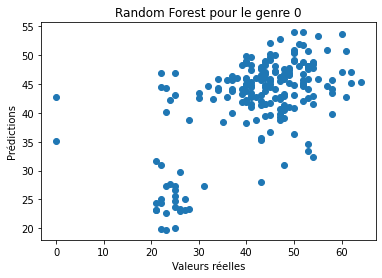

In [51]:
print ("Application du modèle Random Forest sur le sous ensemble de données avec 'track_genre' = 113:")

# Filtrer le dataset pour le genre spécifique
genre_data = data[data['track_genre'] == 113]

# Diviser les données en variables d'entrée X et variable cible y
X_genre = genre_data.drop('popularity', axis=1)
y_genre = genre_data['popularity']

# Diviser les données en ensembles d'entraînement et de test
X_train_genre, X_test_genre, y_train_genre, y_test_genre = train_test_split(X_genre, y_genre, test_size=0.2, random_state=42)

# Créer un modèle de forêt aléatoire
model = RandomForestRegressor()

# Entraîner le modèle sur les données d'apprentissage réduites en dimensions
model.fit(X_train_genre, y_train_genre)

# Prédire les valeurs de popularité sur les données de test réduites en dimensions
y_pred_genre = model.predict(X_test_genre)

mse_genre = mean_squared_error(y_test_genre, y_pred_genre)
mae_genre = mean_absolute_error(y_test_genre, y_pred_genre)
r2_genre = r2_score(y_test_genre, y_pred_genre)

print("Random Forest pour le genre 113:")
print("Erreur quadratique moyenne :", mse_genre)
print("Erreur absolue moyenne :", mae_genre)
print("Coefficient de détermination (R-squared) :", r2_genre)

plt.scatter(y_test_genre, y_pred_genre)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Random Forest pour le genre 113")
plt.show()

Meilleurs paramètres : {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest pour le genre 0 (avec meilleurs hyperparamètres) :
Erreur quadratique moyenne : 76.39592240596164
Erreur absolue moyenne : 6.15237960306202
Coefficient de détermination (R-squared) : 0.3853294905850492


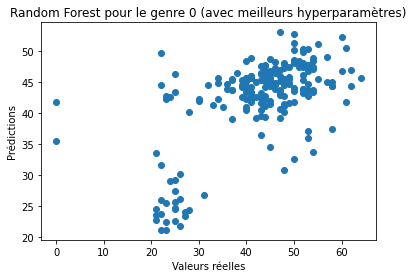

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Définir les hyperparamètres à optimiser
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instancier le modèle RandomForestRegressor
rf = RandomForestRegressor()

# Effectuer une recherche sur grille pour trouver les meilleures valeurs d'hyperparamètres
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train_genre, y_train_genre)

# Obtenir les meilleures valeurs d'hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs paramètres :", best_params)

# Instancier le modèle RandomForestRegressor avec les meilleurs hyperparamètres
best_model = RandomForestRegressor(**best_params)

# Entraîner le modèle sur les données d'apprentissage réduites en dimensions
best_model.fit(X_train_genre, y_train_genre)

# Prédire les valeurs de popularité sur les données de test réduites en dimensions
y_pred_genre = best_model.predict(X_test_genre)

mse_genre = mean_squared_error(y_test_genre, y_pred_genre)
mae_genre = mean_absolute_error(y_test_genre, y_pred_genre)
r2_genre = r2_score(y_test_genre, y_pred_genre)

print("Random Forest pour le genre 113 (avec meilleurs hyperparamètres) :")
print("Erreur quadratique moyenne :", mse_genre)
print("Erreur absolue moyenne :", mae_genre)
print("Coefficient de détermination (R-squared) :", r2_genre)

plt.scatter(y_test_genre, y_pred_genre)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Random Forest pour le genre 113 (avec meilleurs hyperparamètres)")
plt.show()

<font color='blue'>Conclusions ChatGPT:</font>

Les résultats montrent une amélioration des performances du modèle de forêt aléatoire pour le genre 0 lors de l'utilisation des meilleurs hyperparamètres. La MSE, la MAE et le coefficient de détermination (R-squared) ont tous diminué, ce qui indique une meilleure adéquation du modèle aux données.

Les meilleurs hyperparamètres pour le genre 113 sont :

- max_depth = 10
- min_samples_leaf = 4
- min_samples_split = 2
- n_estimators = 300

Ces valeurs permettent d'obtenir une MSE de 76.3959, une MAE de 6.1524 et un R-squared de 0.3853. Cela suggère que l'utilisation de ces hyperparamètres permet d'améliorer les prédictions pour le genre 0 par rapport aux hyperparamètres par défaut du modèle.